### Import modules

In [2]:
from importDataSet import prepare_datasets

### 1. Import the data, split, and feature extraction

In [3]:
data_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/Dataset/dataset'
train_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel2/yoga_train'
val_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel2/yoga_val'
test_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel2/yoga_test'

X_train, y_train, X_val, y_val, X_test, y_test = prepare_datasets(data_dir, train_dir, val_dir, test_dir)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Number of training images: 3838
Number of validation images: 872
Number of test images: 975


In [4]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3838, 150528), (3838,), (872, 150528), (872,), (975, 150528), (975,))

In [5]:
from sklearn.model_selection import train_test_split

# Reduce the number of samples by taking a random subset
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)


In [6]:
X_train_small.shape, y_train_small.shape

((383, 150528), (383,))

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 10,000 features
k = 10000
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_small, y_train_small)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

print(f"Reduced feature size: {X_train_selected.shape[1]}")


Reduced feature size: 10000


In [17]:
X_train_selected.shape

(383, 10000)

### 2. Train the dataset with Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_selected, y_train_small)

# Validate the model
val_predictions = rf_model.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy}")



Validation Accuracy: 0.022935779816513763


In [ ]:

# # Test the model
# test_predictions = rf_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, test_predictions)
# print(f"Test Accuracy: {test_accuracy}")

# # Detailed report
# print("Classification Report:")
# print(classification_report(y_test, test_predictions))

# # Confusion Matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, test_predictions))

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import helperFunctions

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Broadened range
    'max_depth': [None, 10, 20],  # Broadened range
    'min_samples_split': [2, 5, 10],  # Added more options
    'min_samples_leaf': [1, 2, 4]  # Added more options
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV on the reduced training data
grid_search.fit(X_train_selected, y_train_small)

# Best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Training error
train_predictions = best_rf_model.predict(X_train_selected)
train_error = helperFunctions.calculate_error(y_train_small, train_predictions)
print(f"Training Error: {train_error}")

# Validation error
val_predictions = best_rf_model.predict(X_val_selected)
val_error = helperFunctions.calculate_error(y_val, val_predictions)
print(f"Validation Error: {val_error}")

# Print best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Detailed report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, val_predictions))

# Confusion matrix for validation set
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, val_predictions))


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

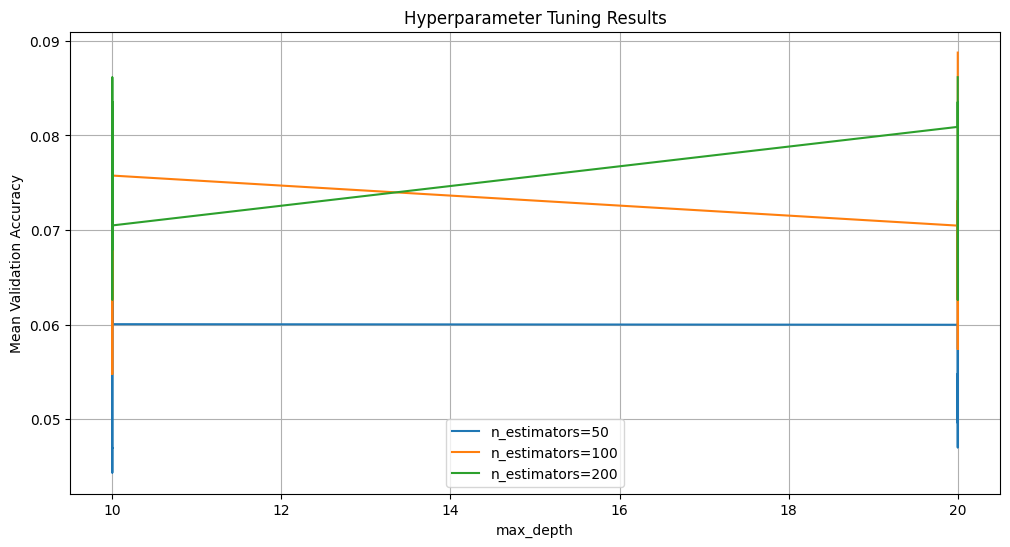

In [20]:
helperFunctions.plot_hyperparameter_tuning_results(grid_search)

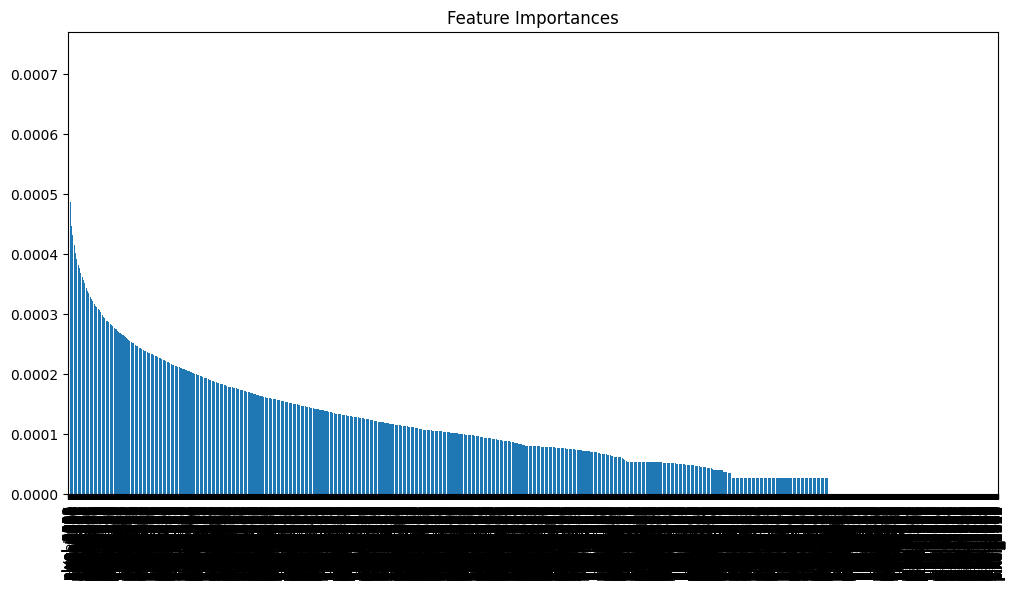

In [22]:
feature_names = [f'pixel_{i}' for i in range(X_train_selected.shape[1])]
helperFunctions.plot_feature_importance(best_rf_model, feature_names)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


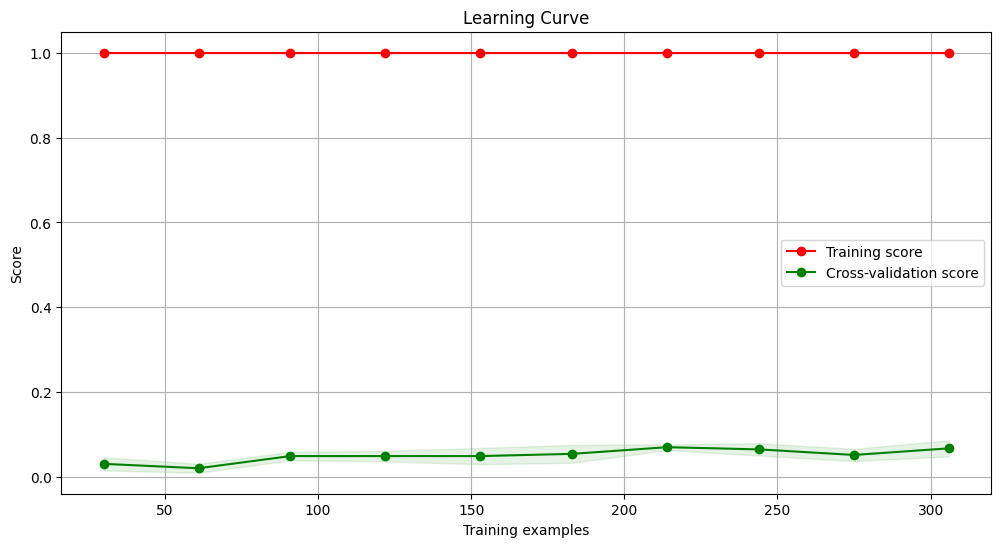

In [23]:
helperFunctions.plot_learning_curve(best_rf_model, X_train_selected, y_train_small, title="Learning Curve")

In [ ]:
# Final evaluation on test set after tuning
test_predictions = best_rf_model.predict(X_test)
test_error = helperFunctions.calculate_error(y_test, test_predictions)
print(f"Test Error: {test_error}")

# Detailed report for test set
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Confusion Matrix for test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions))